# Intro to 4D-STEM data visualization and analysis with py4DSTEM



### Acknowledgements

This tutorial was created by the py4DSTEM instructor team:
- Ben Savitzky (bhsavitzky@lbl.gov)
- Steve Zeltmann (steven.zeltmann@berkeley.edu)
- Stephanie Ribet (sribet@u.northwestern.edu)
- Alex Rakowski (arakowski@lbl.gov)
- Colin Ophus (clophus@lbl.gov)


Updated 11/3/2022

## Set up the environment

In [1]:
# Initialization - import the needed packages.
# For this tutorial, we will need py4DSTEM:
import py4DSTEM

# This line displays the current version of py4DSTEM:
py4DSTEM.__version__

'0.13.8'

If the version is not 0.13.3 or newer, you should quit and run the command line:

```
pip install --upgrade py4DSTEM
```

In [2]:
# py4DSTEM has a quick method to see which modules are installed:
py4DSTEM.check_config()

Checking Module Dependencies
 All Dependencies for Base are Installed 
 Not All Dependencies for Ipyparallel are Installed
 Not All Dependencies for Cuda are Installed
 Not All Dependencies for Acom are Installed
 Not All Dependencies for Aiml are Installed
 Not All Dependencies for Aiml-cuda are Installed
 Not All Dependencies for Numba are Installed


Assuming you have installed the [acom] module, you should see base, acom, and numba packages are installed. If you also include the dask dependencacies for parallel calculations, cuda for NVIDIA GPU calculations, or the ai-ml options for py4DSTEM, those modules will also show as installed.

---
# Download the tutorial data <a class="anchor" id="part_00"></a>

You can download the tutorial dataset here: (501 megabytes)
* [Simulated single crystal and polycrystalline gold](https://drive.google.com/file/d/1PmbCYosA1eYydWmmZebvf6uon9k_5g_S/view?usp=sharing)

# Load data

In [5]:
# This cell should print the contents of a file containing some 4D-STEM data
# if it fails, you may not have access to this dataset - let us know and we'll make sure the file has been shared with you

file_data = r'C:\data\4DSTEM\tutorial\simulatedAuNanoplatelet_binned.h5'
# file_data = "/media/cophus/DataSSD1/data/simulatedAuNanoplatelet_binned.h5"
# file_data = r"C:\data\4DSTEM\tutorial\simulatedAuNanoplatelet_binned.h5"
# file_data = "data/simulatedAuNanoplatelet_binned.h5"

In [6]:
py4DSTEM.io.read(file_data)

py4DSTEM file version 0.11.10
Index     Type              Shape                   Name                                                  
-----     ----              -----                   ----                                                  
  0       DataCube          (100, 84, 125, 125)     polyAu_4DSTEM                                         
  1       DataCube          (100, 84, 125, 125)     simulation_4DSTEM                                     
  2       DiffractionSlice  (512, 512)              defocused_probe                                       
  3       DiffractionSlice  (125, 125)              probe_template                                        


In [7]:
# Load the data
datacube = py4DSTEM.io.read(
    file_data,
    data_id = 'polyAu_4DSTEM'     # The file above has several blocks of data inside - here, we specify the data we want to load
)

What we just did was load the data inside this file called 'polyAu_4DSTEM', and save it as the variable `datacube`.
The output of the previous cell told us that the 'Type' of this data was 'DataCube'.


So exactly is a py4DSTEM DataCube?  Let's try just running it as a python console input:

In [8]:
datacube

DataCube( A 4-dimensional array of shape (100, 84, 125, 125) called 'polyAu_4DSTEM',
          with dimensions:

          Rx = [0,1,...] pixels
          Ry = [0,1,...] pixels
          Qx = [0,1,...] pixels
          Qy = [0,1,...] pixels
)

This is a high-level description of a py4DSTEM datacube - it's four-dimensional, with a shape

`(100 x 84 x 125 x 125)`

The first two indices correspond to real space, which is why they are labeled `Rx` and `Ry`.  The second two indices correspond to diffraction space, and thus are labeled `Qx` and `Qy`.  Currently, we have provided no calibration or pixel sizes to this datacube, which is why the units are in `pixels` and start at `0` with a step of `1`.

# Basic visualization

Evaluating data quality and deciding how to proceed with the analysis almost always begins with visualization. Here, we will go through some visualization functions py4DSTEM uses to visualize 4D data.

Let's first look at a single diffraction pattern. The dataset size is `(100 x 84 x 125 x 125)`, with the first two dimensions representing the position of the electon beam on the sample (`real space`) and the last two dimensions representing pixels on the detector the electrons scattered into (`diffraction space`).  To get a single diffraction pattern we much select an (x,y) probe position with an x-coordinate in the range `0:100` (which in python means from index 0 to 99), and a y-coordinate in the range `0:84`. Let's arbitrarily choose probe position (50,50) - but feel free to change these indices below!

In [9]:
# py4DSTEM.visualize.show(

In [10]:
from py4DSTEM.visualize import show

In [11]:
# datacube.data.shape

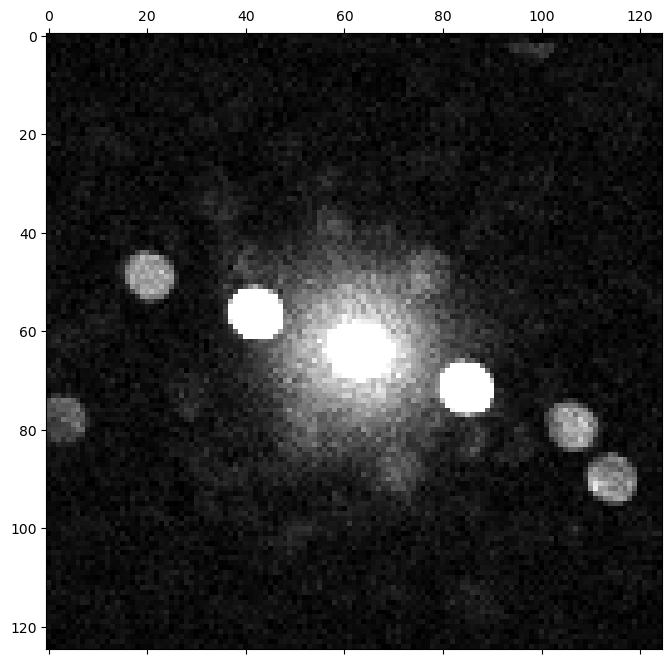

In [12]:
dp = datacube.data[10,30]

show(dp)

It's easy to plot this diffraction image, but we can't see any interesting features. We can only see the central spot, i.e. the unscattered Bragg disk. 

### Image scaling and contrast

To see more details, we need to either use a nonlinear map of intensity --> color, or adjust the color axis range. Both of these are accessed by adding some additional arguments to the `show()` function.

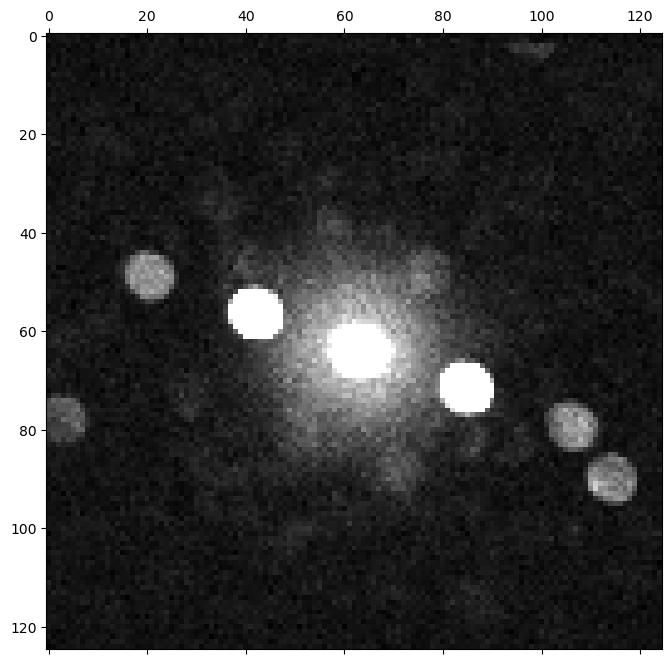

In [13]:
# Let's start by adjusting the color axis range. 
# This means specifiying which pixel intensity values we set to black (min) and which we set to white (max).
# To tell py4DSTEM we want to manually specify the color range to range from 0 to 500, we use these arguments:


py4DSTEM.visualize.show(
    dp,
    intensity_range='absolute',
    vmin=20,
    vmax=200,
    # cmap='viridis',
)

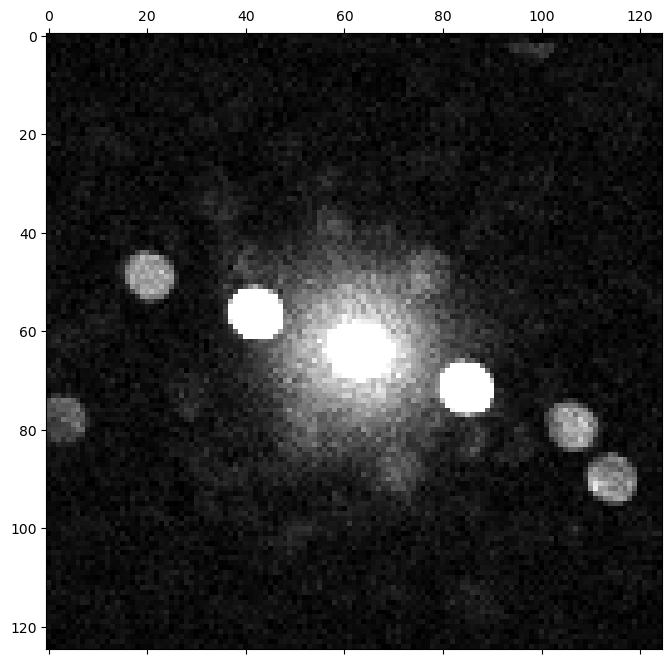

In [14]:
#We can also adjust the intensity range based on the fraction of distributed pixels. 
#The default is using this ordered method with a range of 0.02 - 0.98

py4DSTEM.visualize.show(
    dp,
    # intensity_range='ordered',
    # vmin=0,
    # vmax=1,
    # cmap='viridis',
)

Much more interesting! We can see several diffracted Bragg disks, and the distribution of electrons scattered randomly to low angles (characteristic of amorphous samples, or a plasmon background).

However, we had to saturate the center Bragg disk in order to see the weak features. Can we see both strong and weak features?

Yes! We just need to use logarithmic or power law scaling of the image intensity.

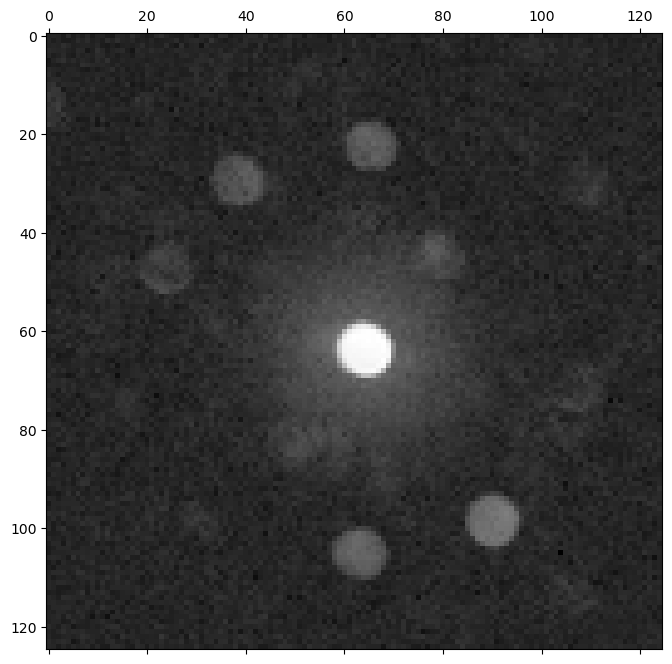

In [15]:
# The easiest thing to do is to logarithmic scaling

py4DSTEM.visualize.show(
    # dp,
    datacube.data[50,10],
    scaling='log',
    vmin = 0, 
    vmax = 1,
)

Now we can appreciate the full range of features present in the data:

- the very bright center disk
- somewhat weaker crystalline Bragg diffracted spots
- a small number of electrons randomly scattered to low angles

We can manually specify the intensity range for logarithm scaling too:

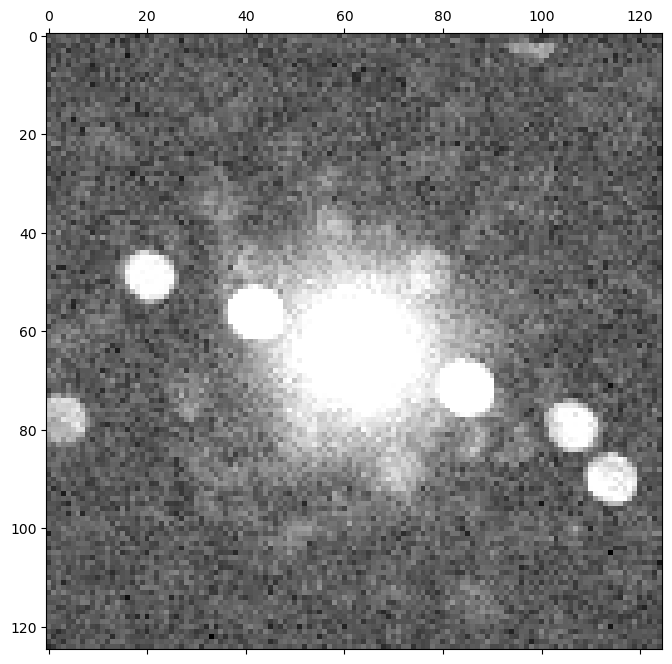

In [16]:
py4DSTEM.visualize.show(
    dp,
    scaling='log',
    vmin=0,
    vmax=0.95,
)

Logarithmic scaling is best when the features of interest have intensities which vary by multiple orders of magnitude.

However for visualization of diffraction patterns, scaling by a power law is often more useful. This is because we can tune the power (intensity^power) to achieve the desired scaling, and because the extremely weak features (such as detector dark current) are typically not that interesting.

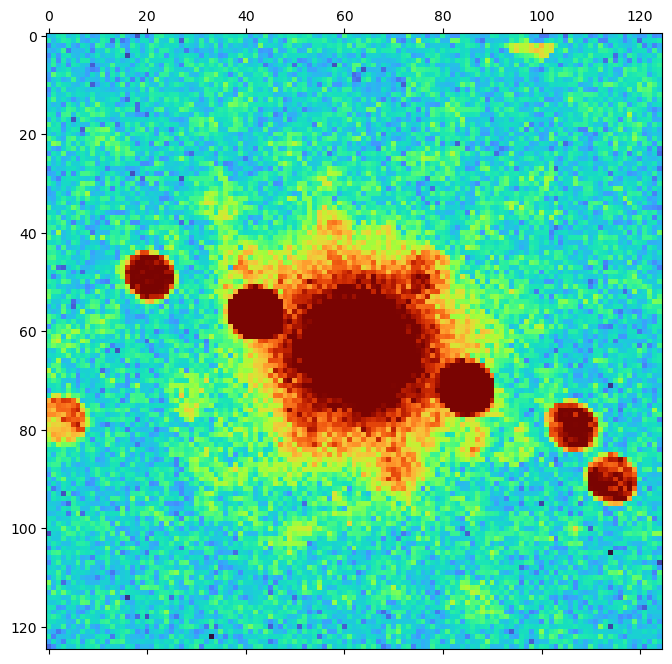

In [17]:
# Power law scaling using the cube root:
py4DSTEM.visualize.show(
    dp,
    scaling='power',
    power=0.25,
    vmin=0,
    vmax=0.95,
    cmap='turbo',
)

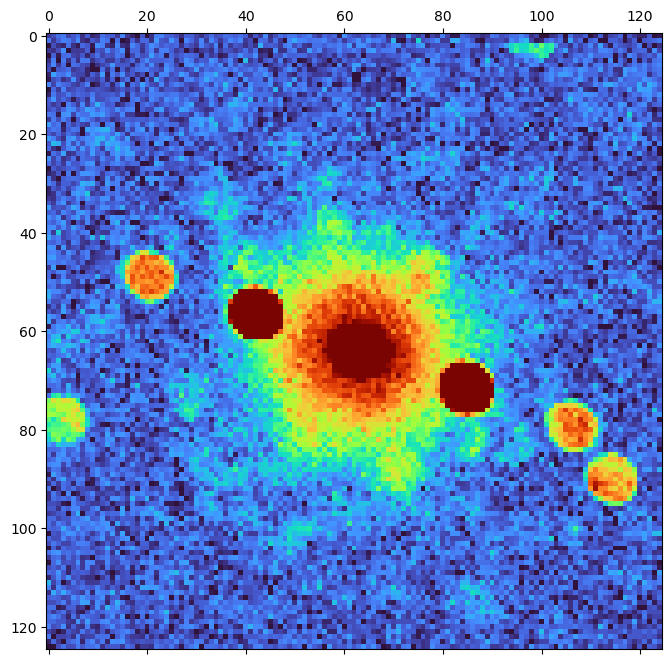

In [18]:
# Power law scaling using the quarter root:
py4DSTEM.visualize.show(
    dp,
    scaling='power',
    power=0.25,
    cmap='turbo',
)

### Mean and maximum diffraction patterns

The above examples look at a single diffraction pattern. Real experiments might consist of thousands or even millions of diffraction patterns. We want to evaluate the contents of the dataset as quickly as possible - is it single crystal? Polycrstalline? Amorphous? A mixture? To answer these questions, we need to operate on the entire dataset - the simplest such operation is to calculate the mean diffraction pattern.

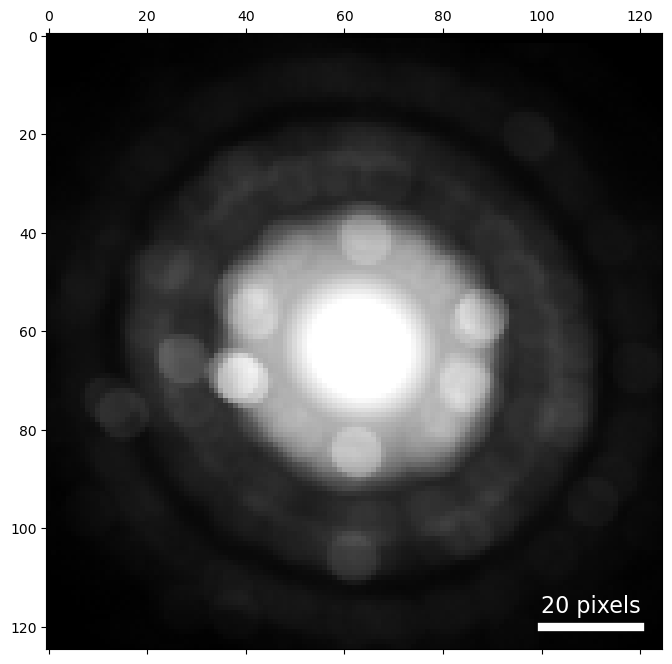

In [19]:
# Calculate the mean diffraction pattern:
dp_mean = datacube.get_dp_mean()

# Plot the mean diffraction pattern:
py4DSTEM.visualize.show(
    dp_mean,
    scaling='log',
)

We also don't need to actually save `dp_mean` as an output numpy array - using the `get_dp_mean` method for datacube will automatically store it inside the `tree` of datacube.  Note that the mean diffraction pattern data is actually stored in `datacube.tree['dp_mean'].data`.  Omitting `.data` is just a feature of the show() function.

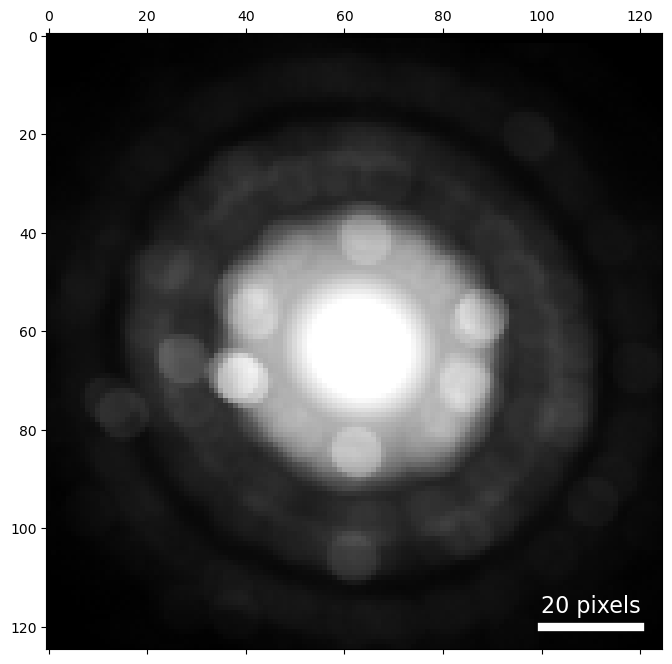

In [20]:
datacube.get_dp_mean()

# Plot the mean diffraction pattern:
py4DSTEM.visualize.show(
    datacube.tree['dp_mean'],
    scaling='log'
)

We see some interesting features, such as the ring of intensity containing some Bragg disks.  However, it's very difficult to see diffraction features which may occur in a small number of scan positions.

We have a standard solution to this problem - we typically visualize the **maximum** diffraction pattern, rather than the mean. By this, we mean the maximum signal of each pixel in diffraction space over all probe positons.

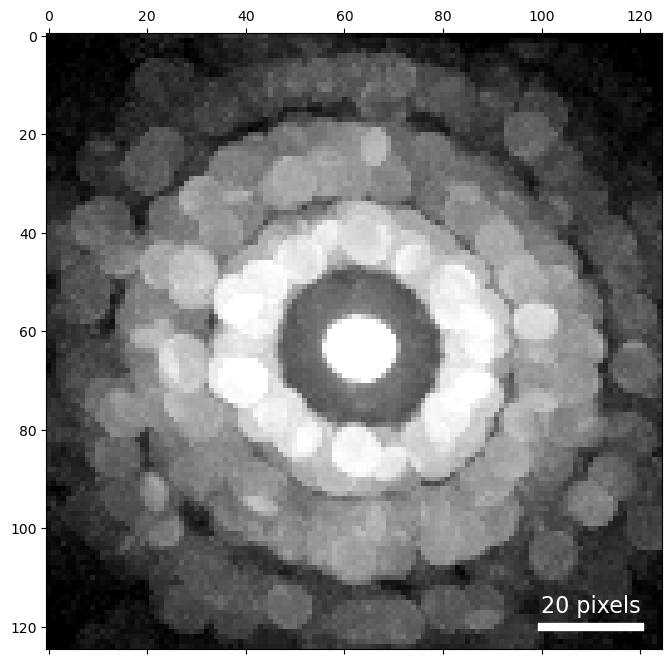

In [21]:
# Calculate maximum diffraction pattern:
datacube.get_dp_max()

# Plot the maximum diffraction pattern:
py4DSTEM.visualize.show(
    datacube.tree['dp_max'],
    scaling='log'
)

Now we have a good idea of the contents of this 100 x 84 position dataset - various randomly oriented grains with strong Bragg diffraction.

## Virtual imaging

Next, let's visualize this data in real space using virtual detectors. Specifically, we will generate a virtual bright field (BF) and virtual dark field (DF) image. For this, we need to know the position of the center disk and an approximate radius for it.

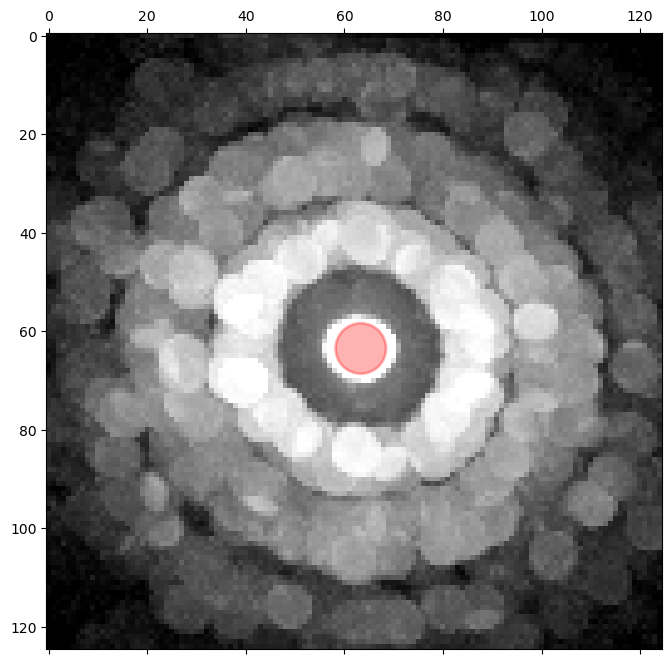

Estimated probe radius = 5.12 pixels


In [22]:
# Estimate the radius of the BF disk, and the center coordinates
probe_semiangle, probe_qx0, probe_qy0 = py4DSTEM.process.calibration.get_probe_size(
    datacube.tree['dp_mean'].data,
)

# Overlay the estimated probe position and radius on the maximum diffraction pattern
py4DSTEM.visualize.show(
    datacube.tree['dp_max'].data, 
    scaling='log',
    circle = {
      'center':(probe_qx0, probe_qy0),
      'R': probe_semiangle,
      'alpha':0.3,
      'fill':True
    }
)

# Print the estimate probe radius
print('Estimated probe radius =', '%.2f' % probe_semiangle, 'pixels')

The estimated probe size is slightly too small, because of the diffraction shift of this pattern. We could align all of the images, but it's typically much faster to just expand the bright field detector range.

### Bright-field imaging

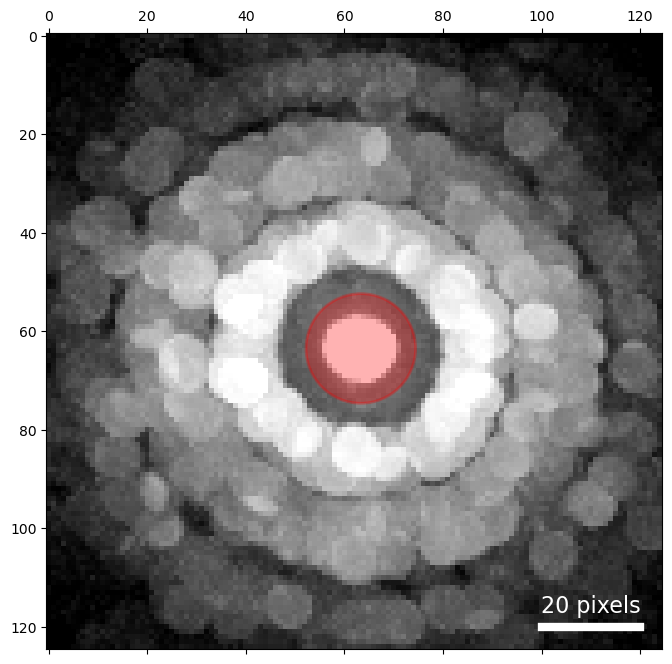

In [23]:
# Create a bright field (BF) virtual detector using the the center beam position, and expanding the radius slightly.
expand_BF = 6.0

# Overlay the estimated probe position and radius on the maximum diffraction pattern
py4DSTEM.visualize.show(
    datacube.tree['dp_max'], 
    scaling='log',
    circle = {
      'center':(probe_qx0, probe_qy0),
      'R': probe_semiangle + expand_BF,
      'alpha':0.3,
      'fill':True
    }
)


In [24]:
# datacube.get_dp_median()

In [25]:
# datacube.tree

In [26]:
# datacube.tree['bright_field'].data

100%|███████████████████████████████████████████████████████████████████████████| 8400/8400 [00:00<00:00, 25578.50it/s]


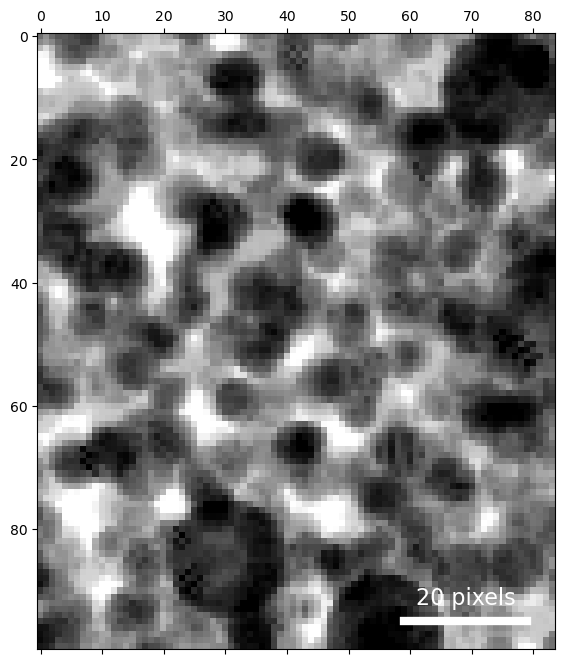

In [27]:
# Using this virtual detector, capture and display a BF image
center = (probe_qx0, probe_qy0)
radius = probe_semiangle + expand_BF

datacube.get_virtual_image(
    mode = 'circle',
    geometry = (center,radius),
    name = 'bright_field',
)

# plot the bright field image which is now stored in the `tree` of datacube
py4DSTEM.visualize.show(datacube.tree['bright_field'])

### Annular dark-field imaging

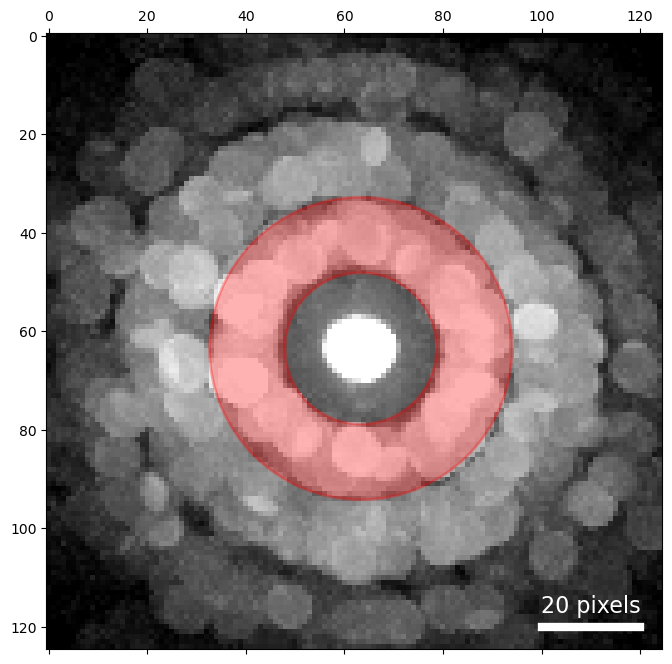

In [28]:
# Create an annular dark field (ADF) virtual detector using the the center beam position, and expanding the radius slightly.
r_inner = probe_semiangle * 3
r_outer = probe_semiangle * 6

# Show the ADF detector
py4DSTEM.visualize.show(
    datacube.tree['dp_max'], 
    scaling='log',
    annulus = {
      'center':(probe_qx0, probe_qy0),
      'radii':(r_inner, r_outer),
      'alpha':0.3,
      'fill':True
    }
)

In [29]:
import numpy as np

In [30]:
mask = np.zeros(datacube.Qshape,dtype='bool')
mask[60:70,23:33] = True

# datacube.get_virtual_image(
#     mode = 'mask',
#     geometry = mask,
#     name = 'masked'
# )

100%|███████████████████████████████████████████████████████████████████████████| 8400/8400 [00:00<00:00, 25442.16it/s]


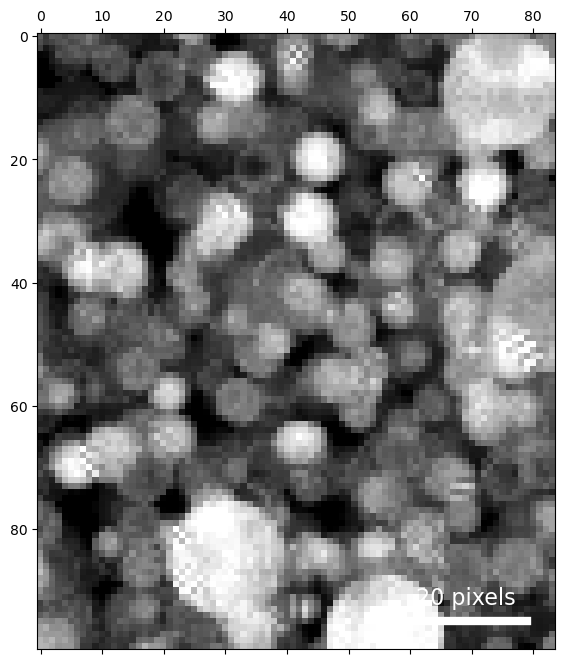

In [31]:
# Using this detector, capture and display an ADF image

# Using this virtual detector, capture and display a BF image
center = (probe_qx0, probe_qy0)
radii = (r_inner, r_outer)

datacube.get_virtual_image(
    mode = 'annulus',
    geometry = (center,radii),
    name = 'dark_field'
)

# plot the dark field image which is now stored in the `tree` of datacube
py4DSTEM.visualize.show(datacube.tree['dark_field'])

### Off axis dark-field imaging

In traditional TEM dark-field imaging, the sample is illuminated with a parallel beam, and an aperture is placed in the diffraction plane around a point of interest, creating pattern in the image plane resulting from electrons scattered only through those areas of diffraction space.  We can create a similar virtual image by placing a circular detector in an off-axis position in diffraction space.

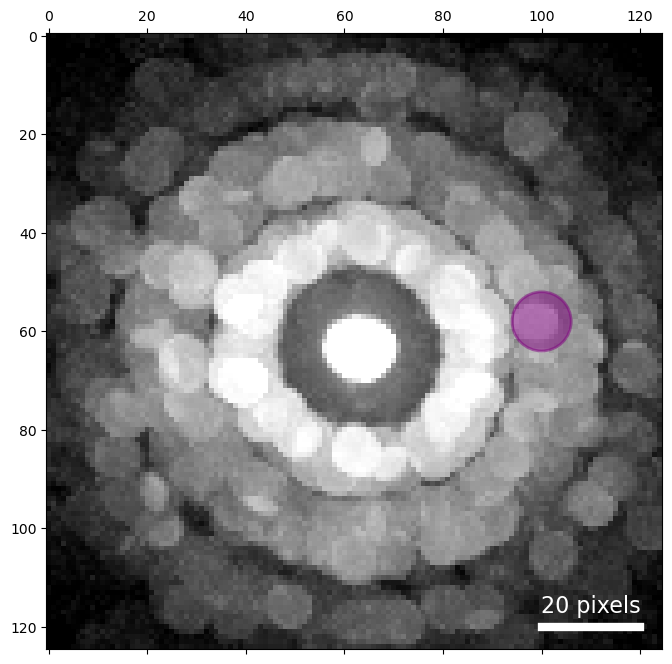

In [39]:
# Create an off-axis dark-field (DF) virtual detector using the the center beam position, and expanding the radius slightly.

# qx0_DF,qy0_DF = 116,49
qx0_DF,qy0_DF = 58,100

r_DF = 6

# Show the BF detector
py4DSTEM.visualize.show(
    datacube.tree['dp_max'], 
    scaling='log',
    circle = {
      'center':(qx0_DF,qy0_DF),
      'R': r_DF,
      'alpha':0.5,
      'fill':True,
      'color':'purple'
    }
)

100%|███████████████████████████████████████████████████████████████████████████| 8400/8400 [00:00<00:00, 25678.31it/s]


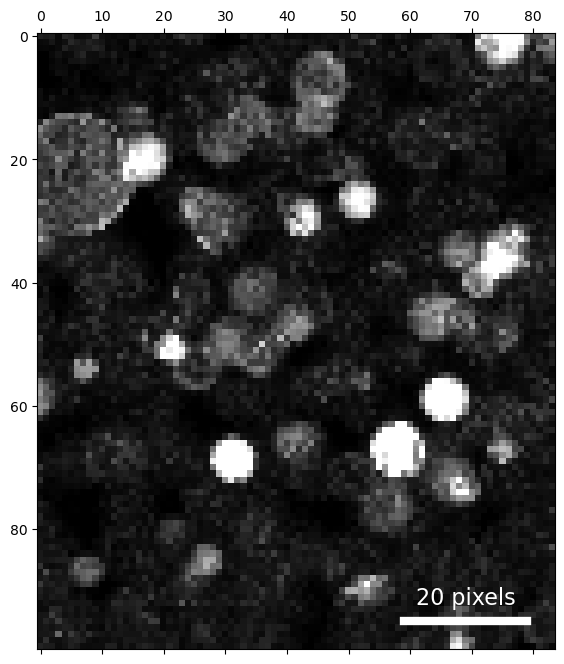

In [40]:
# Using this detector, capture and display the DF image
datacube.get_virtual_image(
    mode = 'circle',
    geometry = ((qx0_DF, qy0_DF), r_DF),
    name = 'virt_dark_field_01'
)
py4DSTEM.visualize.show(datacube.tree['virt_dark_field_01'])

### Virtual diffraction

We can also do the inverse - create an average diffraction pattern from some subset of scan positions, showing us what the scattering is like in just those positions in real space

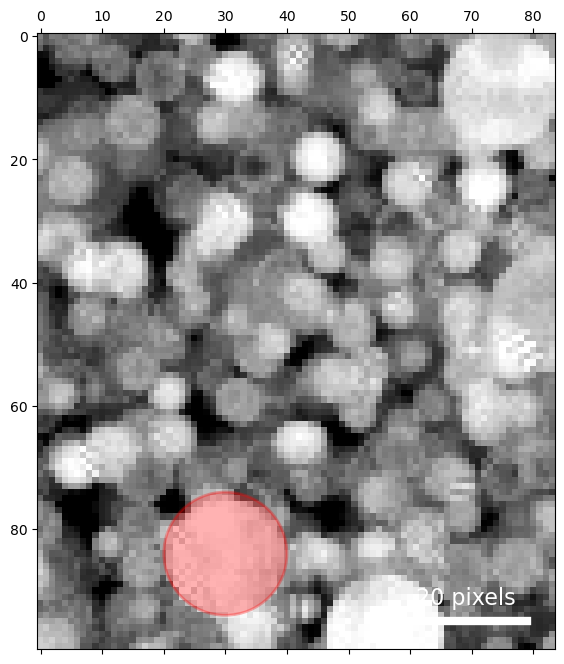

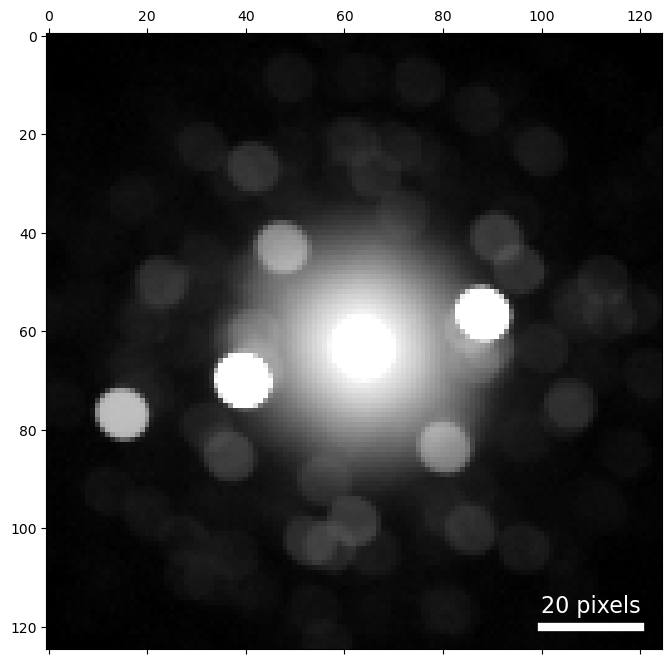

In [41]:
# Select a region of real space and make a circular mask

mask_x0, mask_y0 = 84,30
mask_radius = 10


# Generate a mean diffraction pattern by taking the average diffraction pattern inside our mask
selected_area_diffraction_01 = datacube.get_virtual_diffraction(
    method = 'mean',
    geometry = ((mask_x0, mask_y0),radius),
    mode = 'circular'
)

# plot the mask geometry, overlaid onto the dark field image we created earlier
py4DSTEM.visualize.show(
    datacube.tree['dark_field'],
    scaling='log',
    circle = {
      'center':(mask_x0, mask_y0),
      'R': mask_radius,
      'alpha':0.3,
      'fill':True
    }
)

# Plot the diffraction pattern
py4DSTEM.visualize.show(
    selected_area_diffraction_01,
    scaling='log',
)

We placed our mask over one Au nanoparticle, so that average diffraction pattern above shows us something about the orientation of this particle.  In a later tutorial, we'll see how to map the crystallographic orientations of all the particles in the dataset.